In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(".."))
import seaborn as sns
import matplotlib.pyplot as plt
from src.config import RAW_DATA_PATH
from src.load_raw_data import load_raw_datasets
print("RAW_DATA_PATH =", RAW_DATA_PATH)

RAW_DATA_PATH = c:\Users\panos\Desktop\Data Engineering\Project\cityretail\data\raw


## Load Raw Data

In [2]:
# Load datasets using the environment-aware path
dfs = load_raw_datasets(RAW_DATA_PATH)
calendar = dfs["calendar"]
cities_lookup = dfs["cities_lookup"]
products = dfs["products"]
sales = dfs["sales"]
stores = dfs["stores"]

2025-07-16 12:19:51,593 [INFO] Loaded 'calendar' (365 rows, 7 columns)
2025-07-16 12:19:51,596 [INFO] Loaded 'cities_lookup' (10 rows, 2 columns)


2025-07-16 12:19:51,599 [INFO] Loaded 'products' (20 rows, 6 columns)
2025-07-16 12:19:51,606 [INFO] Loaded 'sales' (5000 rows, 6 columns)
2025-07-16 12:19:51,608 [INFO] Loaded 'stores' (10 rows, 4 columns)


## Inspection

In [3]:
def deep_inspect(df, name):
    """
    Print a comprehensive inspection report of a DataFrame.
    - Shape and column names
    - Data types
    - Missing values and hidden nulls
    - Duplicate rows
    - Sample records
    """
    print(f"\nInspecting {name.upper()}")
    print("-" * 60)
    print("Shape:", df.shape)  # Print number of rows and columns
    print("Columns:", df.columns.tolist())  # List of column names
    print("Column Types:\n", df.dtypes)  # Data types of each column
    print("\nMissing Values:\n", df.isnull().sum())  # Count of true nulls (NaNs)

    # Check for hidden nulls represented as blank strings or placeholders
    print("Hidden Nulls (blanks, 'NaN', 'NULL'):")
    for col in df.columns:
        hidden_nulls = df[col].astype(str).str.strip().isin(["", "NaN", "NULL"]).sum()
        if hidden_nulls > 0:
            print(f"  - {col}: {hidden_nulls}")

    print("\nDuplicate Rows:", df.duplicated().sum())  # Count duplicate rows
    display(df.head(3))  # Show sample data

# Loop through each DataFrame and run inspection
for name, df in dfs.items():
    deep_inspect(df, name)


Inspecting CALENDAR
------------------------------------------------------------
Shape: (365, 7)
Columns: ['DateID', 'Date', 'Year', 'Quarter', 'Month', 'Day', 'Weekday']
Column Types:
 DateID      int64
Date       object
Year        int64
Quarter     int64
Month       int64
Day         int64
Weekday    object
dtype: object

Missing Values:
 DateID     0
Date       0
Year       0
Quarter    0
Month      0
Day        0
Weekday    0
dtype: int64
Hidden Nulls (blanks, 'NaN', 'NULL'):

Duplicate Rows: 0


,DateID,Date,Year,Quarter,Month,Day,Weekday
0,1,2024-01-01,2024,1,1,1,Monday
1,2,2024-01-02,2024,1,1,2,Tuesday
2,3,2024-01-03,2024,1,1,3,Wednesday



Inspecting CITIES_LOOKUP
------------------------------------------------------------
Shape: (10, 2)
Columns: ['RawCity', 'StandardCity']
Column Types:
 RawCity         object
StandardCity    object
dtype: object

Missing Values:
 RawCity         0
StandardCity    0
dtype: int64
Hidden Nulls (blanks, 'NaN', 'NULL'):

Duplicate Rows: 0


,RawCity,StandardCity
0,Athens,Athens
1,Athns,Athens
2,Thessaloniki,Thessaloniki



Inspecting PRODUCTS
------------------------------------------------------------
Shape: (20, 6)
Columns: ['ProductID', 'ProductName', 'Category', 'Subcategory', 'CostPrice', 'SalePrice']
Column Types:
 ProductID        int64
ProductName     object
Category        object
Subcategory     object
CostPrice      float64
SalePrice      float64
dtype: object

Missing Values:
 ProductID      0
ProductName    0
Category       0
Subcategory    0
CostPrice      0
SalePrice      0
dtype: int64
Hidden Nulls (blanks, 'NaN', 'NULL'):

Duplicate Rows: 0


,ProductID,ProductName,Category,Subcategory,CostPrice,SalePrice
0,1001,Product_1,Dairy,Medium,16.03,25.61
1,1002,Product_2,Household,Low,5.19,7.20
2,1003,Product_3,Beverages,Medium,11.01,16.65



Inspecting SALES
------------------------------------------------------------
Shape: (5000, 6)
Columns: ['SalesID', 'DateID', 'ProductID', 'StoreID', 'QtySold', 'Revenue']
Column Types:
 SalesID        int64
DateID         int64
ProductID      int64
StoreID        int64
QtySold        int64
Revenue      float64
dtype: object

Missing Values:
 SalesID      0
DateID       0
ProductID    0
StoreID      0
QtySold      0
Revenue      0
dtype: int64
Hidden Nulls (blanks, 'NaN', 'NULL'):

Duplicate Rows: 0


,SalesID,DateID,ProductID,StoreID,QtySold,Revenue
0,1,125,1015,208,3,40.35
1,2,71,1014,208,4,69.52
2,3,209,1011,203,2,57.72



Inspecting STORES
------------------------------------------------------------
Shape: (10, 4)
Columns: ['StoreID', 'StoreName', 'City', 'Region']
Column Types:
 StoreID       int64
StoreName    object
City         object
Region       object
dtype: object

Missing Values:
 StoreID      0
StoreName    0
City         0
Region       0
dtype: int64
Hidden Nulls (blanks, 'NaN', 'NULL'):

Duplicate Rows: 0


,StoreID,StoreName,City,Region
0,201,Store_1,Heraklion,Crete
1,202,Store_2,Larissa,Thessaly
2,203,Store_3,Athens,Attica


## Check City Name Consistency

In [4]:
def check_city_consistency(stores_df, lookup_df):
    """
    Compare city names in stores with cities_lookup to find mismatches.
    This helps ensure cities used in stores.csv match standard city names.
    """
    # Normalize city names by stripping whitespace and converting to lowercase
    store_cities = set(stores_df['City'].str.strip().str.lower())
    valid_cities = set(lookup_df['RawCity'].str.strip().str.lower())

    # Identify inconsistent city names not found in lookup
    inconsistent = store_cities - valid_cities

    print("\nCity Name Consistency Check")
    if inconsistent:
        print("Inconsistent city names found:")
        for city in inconsistent:
            print("-", city)
    else:
        print("All city names are consistent with the lookup.")

    return inconsistent

inconsistent_cities = check_city_consistency(stores, cities_lookup)


City Name Consistency Check
All city names are consistent with the lookup.


In [5]:
print(stores.columns)

Index(['StoreID', 'StoreName', 'City', 'Region'], dtype='object')


## Stores per City — Bar Chart

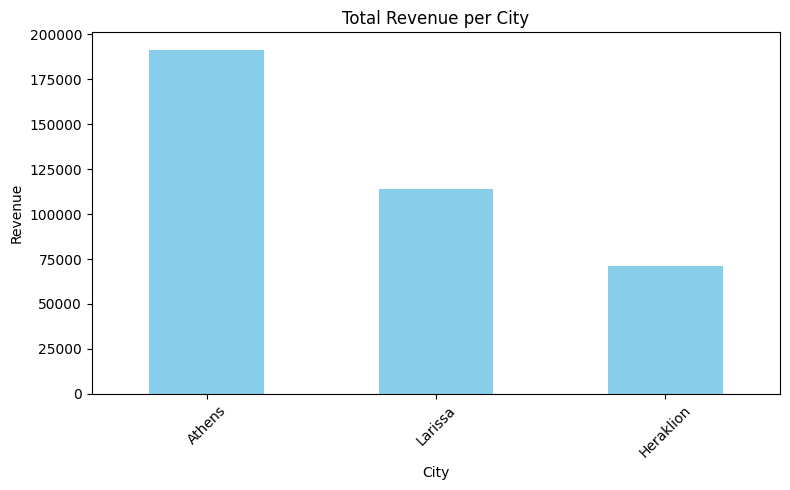

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by city and sum revenue
sales_with_city = pd.merge(sales, stores[['StoreID', 'City']], on='StoreID', how='left')
revenue_by_city = sales_with_city.groupby('City')['Revenue'].sum().sort_values(ascending=False)

# Plot total revenue per city
plt.figure(figsize=(8, 5))
revenue_by_city.plot(kind='bar', color='skyblue')
plt.title("Total Revenue per City")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Revenue Distribution — Histogram

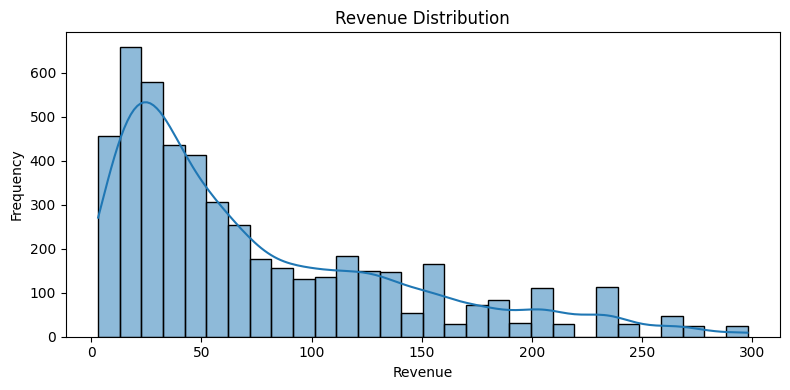

In [7]:
# Plot distribution of transaction-level revenue
plt.figure(figsize=(8, 4))
sns.histplot(sales['Revenue'], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Quantity Sold — Boxplot

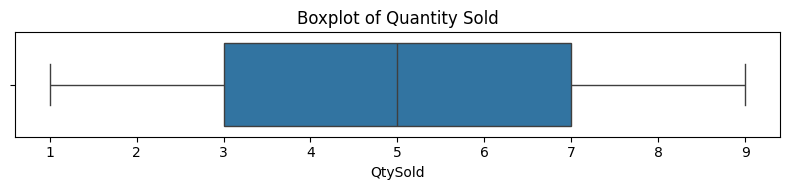

In [8]:
# Boxplot to detect outliers in quantity sold
plt.figure(figsize=(8, 2))
sns.boxplot(x=sales['QtySold'])
plt.title("Boxplot of Quantity Sold")
plt.tight_layout()
plt.show()

## Top 10 Products by Total Revenue — Bar Chart

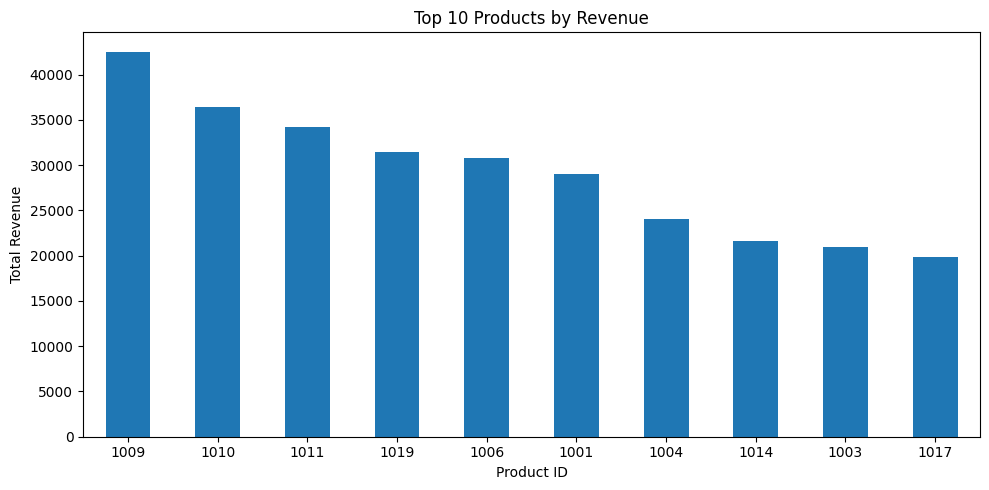

In [9]:
# Total revenue per product
top_products = sales.groupby('ProductID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product ID")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Sales by Month — Line Chart

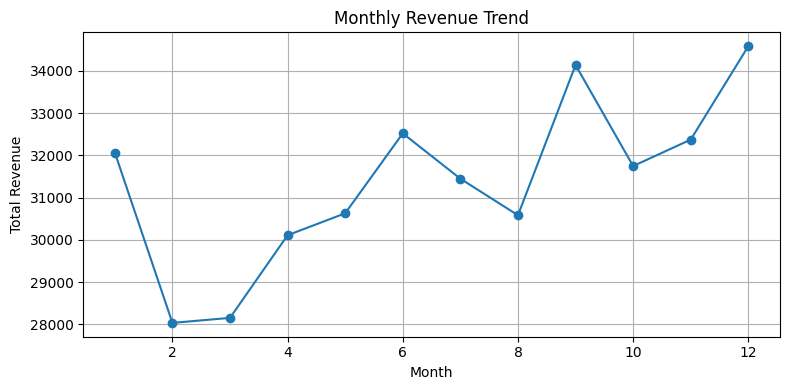

In [10]:
# Merge sales with calendar to get dates
sales_with_dates = sales.merge(calendar, on="DateID")

# Aggregate revenue by Month
monthly_sales = sales_with_dates.groupby('Month')['Revenue'].sum().sort_index()

# Plot
plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()